In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
model_metrics_path = "./mnist-1k/trainer_state.json"
with open(model_metrics_path, "r") as f:
    metrics_json = json.load(f)

log_metrics_df = pd.DataFrame(metrics_json["log_history"])
training_metrics_df = log_metrics_df[log_metrics_df["loss"].notna()]
eval_metrics_df = log_metrics_df[log_metrics_df["eval_loss"].notna()]

log_metrics_df

,epoch,learning_rate,loss,step,eval_accuracy,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,0.31,0.000184,2.1658,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.62,0.000169,1.6959,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.94,0.000153,1.2370,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.25,0.000138,0.8495,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.56,0.000122,0.5745,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.88,0.000106,0.4345,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.19,0.000091,0.2848,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.50,0.000075,0.2422,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.81,0.000059,0.2058,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.12,0.000044,0.1884,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
training_metrics_df

,epoch,learning_rate,loss,step,eval_accuracy,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,0.31,0.000184,2.1658,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.62,0.000169,1.6959,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.94,0.000153,1.2370,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.25,0.000138,0.8495,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.56,0.000122,0.5745,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.88,0.000106,0.4345,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.19,0.000091,0.2848,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.50,0.000075,0.2422,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.81,0.000059,0.2058,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.12,0.000044,0.1884,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'learning rate')

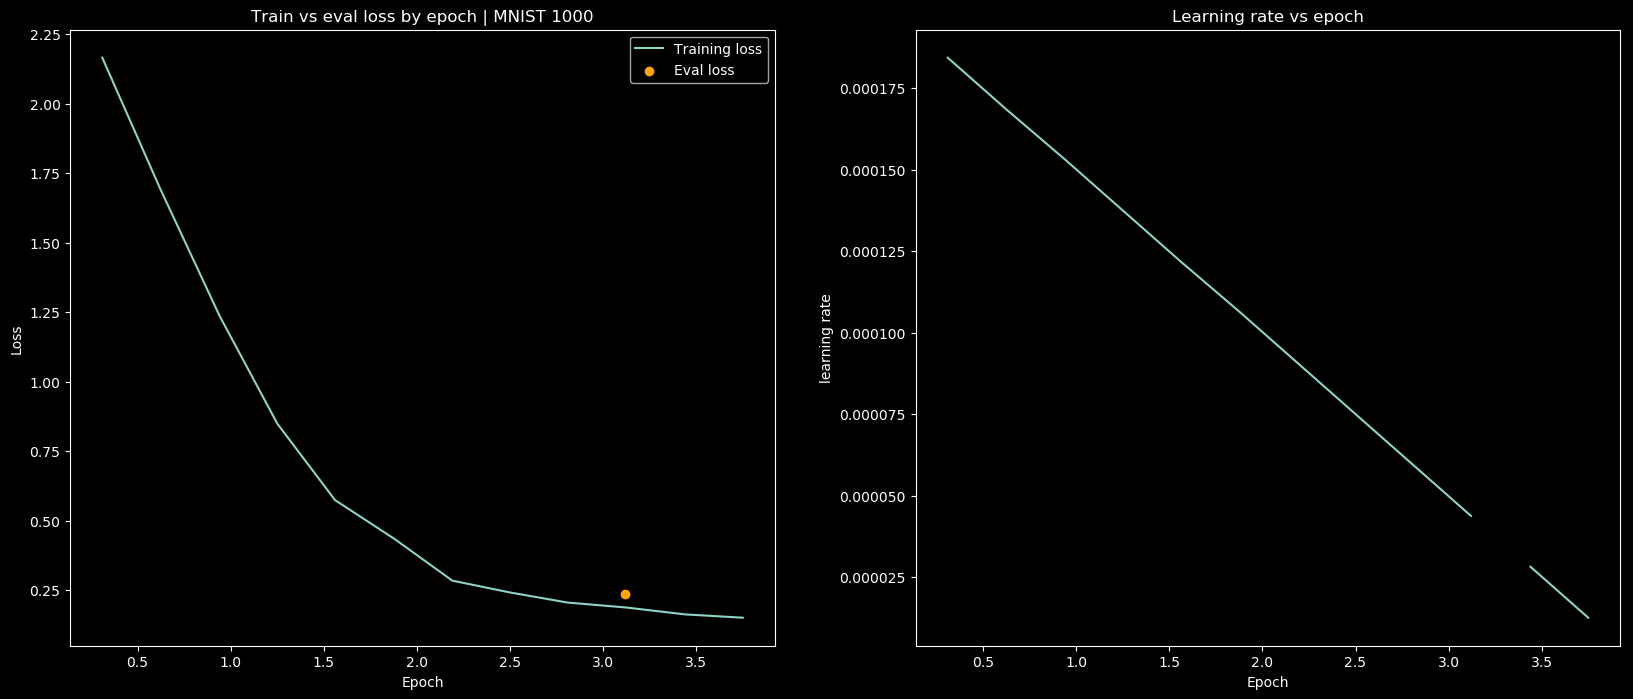

In [16]:
DATASET_SIZE = 1000

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

ax1.plot(training_metrics_df["epoch"].to_numpy(), training_metrics_df["loss"].to_numpy(), label="Training loss")
ax1.scatter(eval_metrics_df["epoch"].to_numpy(), eval_metrics_df["eval_loss"].to_numpy(), label="Eval loss", color="orange")
ax1.legend()
ax1.set_title(f"Train vs eval loss by epoch | MNIST {DATASET_SIZE}")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(log_metrics_df["epoch"].to_numpy(), log_metrics_df["learning_rate"].to_numpy())
ax2.set_title("Learning rate vs epoch")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("learning rate")